Original data shape: (96453, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
                  Formatted Dat

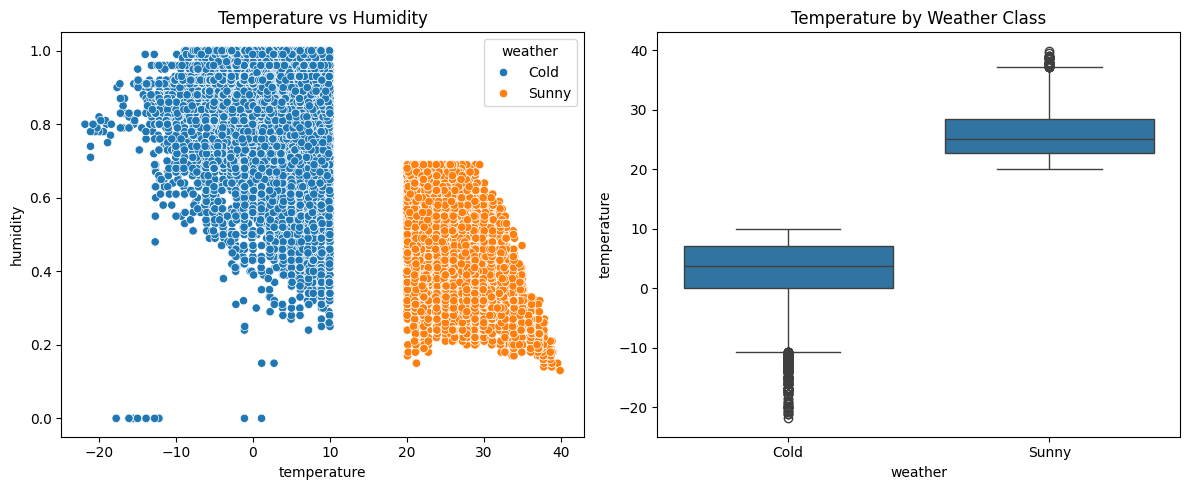


Processed data saved to D:\FCDS\semster 8\IOT 2\Projects\project 2\tinyml-weather-classification\data\labeled\weather_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw data
data_path = r"D:\FCDS\semster 8\IOT 2\Projects\project 2\tinyml-weather-classification\data\raw\weatherHistory.csv"
df = pd.read_csv(data_path)

# Display basic info
print("Original data shape:", df.shape)
print(df.info())
print(df.head())

# Simplify the problem: We'll classify based on temperature and humidity only
# Let's define:
# - "Cold" as temperature <= 10°C
# - "Sunny" as temperature > 20°C and humidity < 0.7
# (You can adjust these thresholds based on your climate)

# Create binary labels
df['weather'] = np.where(
    (df['Temperature (C)'] > 20) & (df['Humidity'] < 0.7),
    'Sunny',
    np.where(
        df['Temperature (C)'] <= 10,
        'Cold',
        None  # We'll exclude intermediate temperatures
    )
)

# Drop rows with intermediate temperatures (not clearly sunny or cold)
df = df.dropna(subset=['weather'])

# Select only the columns we need
processed_df = df[['Temperature (C)', 'Humidity', 'weather']].rename(columns={
    'Temperature (C)': 'temperature',
    'Humidity': 'humidity'
})

# Check class distribution
print("\nClass distribution after processing:")
print(processed_df['weather'].value_counts())

# Visualize the selected features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=processed_df, x='temperature', y='humidity', hue='weather')
plt.title('Temperature vs Humidity')

plt.subplot(1, 2, 2)
sns.boxplot(data=processed_df, x='weather', y='temperature')
plt.title('Temperature by Weather Class')
plt.tight_layout()
plt.show()

# Save the processed data
output_path =r"D:\FCDS\semster 8\IOT 2\Projects\project 2\tinyml-weather-classification\data\labeled\weather_data.csv"
processed_df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to {output_path}")